# Deep learning Practical Assignment #1

## G-2 : Mohamed Ghaith Belkacem & Mehdi Rachico

# Part 1 :Theoretical questions

### Question 1

#### Question 1.a : What is the computational/time complexity of the basic perceptron algorithm ?
O(n x m), where n is the maximum number of iterations and m is the number of instances in the training set

#### Question 1.b : What is the space complexity of the basic perceptron algorithm ?
The space complexity of the perceptron algorithm grows with the number of dimensions, is equal to O(Ri+1), where i is the number of dimensions (features).

# Part 2 : Installations/versions

In [47]:
!pip install numpy==1.16.5
!pip install pandas==0.25.1
!pip install sklearn==0.21.3
!pip install matplotlib==3.1.1

  Found existing installation: numpy 1.18.0
    Uninstalling numpy-1.18.0:
      Successfully uninstalled numpy-1.18.0


ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.16.5 which is incompatible.


  ERROR: Could not find a version that satisfies the requirement sklearn==0.21.3 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.21.3


# Part 3 : Experiments

### Experiement 1 

👉 Importing packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

👉 Generating our dataset

In [2]:
mu = [-1,0]
sigma = [[0.25,0], [0,0.25]]
x1 = np.random.multivariate_normal(mu,sigma,125)

mu = [1,0]
sigma = [[0.25,0], [0,0.25]]
x2 = np.random.multivariate_normal(mu,sigma,125)

X = np.concatenate((x1, x2), axis=0)
print(X)

[[-6.77753505e-01 -1.98738342e-01]
 [-1.01004203e+00  2.04118566e-01]
 [-3.19061104e-01  4.91818359e-01]
 [-8.78467211e-01 -1.51112067e-01]
 [-8.88255006e-01  4.35866761e-01]
 [-9.60248678e-01 -1.75960719e-01]
 [-1.37093299e+00 -7.30161963e-01]
 [-1.12111252e+00  1.11962428e-01]
 [-1.31908266e+00  4.39968266e-01]
 [-5.77422436e-01  9.21028824e-01]
 [-9.60950748e-01  2.87944643e-01]
 [-1.64358439e+00  5.77336499e-01]
 [-1.72779556e+00 -2.96297652e-01]
 [-3.28495292e-01 -5.08893250e-01]
 [-1.09040461e+00 -4.31744527e-01]
 [-3.87996734e-01 -7.32977666e-02]
 [-1.75433071e+00 -4.53950707e-01]
 [-4.84744920e-01 -5.95769739e-02]
 [-1.08866557e+00 -6.24705490e-01]
 [-1.18230419e+00 -7.34772568e-01]
 [-9.32538824e-01 -1.00104318e+00]
 [ 8.90963229e-02  1.00981586e+00]
 [-8.41842163e-01  2.75244565e-01]
 [-9.22382906e-01  4.13710144e-01]
 [-1.13591384e+00  9.53737982e-01]
 [-1.80102193e+00 -5.04308861e-01]
 [-9.16691012e-01 -1.01463762e-01]
 [-1.37487096e+00 -1.04497715e-02]
 [-5.50966299e-01 -5

👉 Generating our target labels

In [3]:
y = [-1] * 125 + [1] * 125


In [4]:
len(y), len(X)


(250, 250)

The perceptron algorithm does not converge because the data is not linearly separable.
We can use an additional parameter for the number of iterations and consider it converging if attains a certain number of iterations

👉 Shuffling the data

In [5]:
X, y = shuffle(X, y)

👉 Spliting the data into a train set and a test set 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

👉 Implementation of the Perceptron algorithm

In [20]:
def simple_perceptron(X, y, n):
    w = np.zeros((1,2))
    temp_w = np.zeros((1,2))
    for t in range(n):
        for a, b in zip(X, y):
            if  b * np.inner(w, a) <= 0 : 
                temp_w = w
                w = w + b*a
        if (w == temp_w).all():
            return w,t
    if t == n-1 :
        print("No convergence")
    else :
        print("Convergence")
    return w,t

👉 Running the Perceptron Function

In [21]:
n = 2000
w,t= simple_perceptron(X_train, y_train, n)
print("w = ", w)
if t == n - 1:
    print("The algorithm does not converge")
else:
    print("The algorithm converges")

No convergence
w =  [[-2.1631868  -1.39293103]]
The algorithm does not converge


👉 Plotting the decision line found by the algorithm

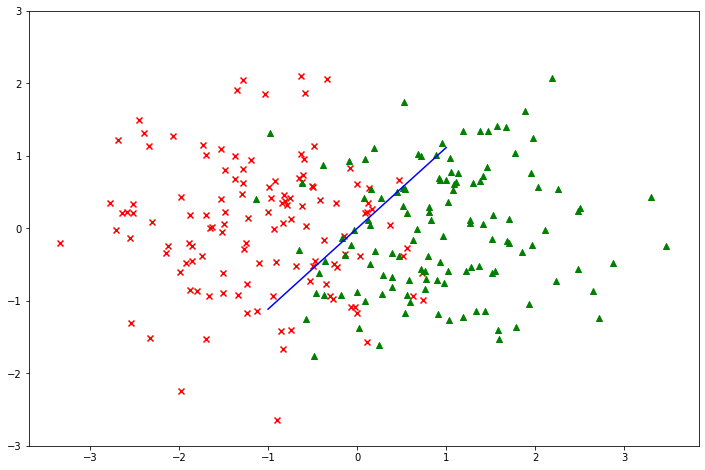

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(x1[:,0], x1[:,1], marker = 'x', c ='red')
plt.scatter(x2[:,0], x2[:,1], c = 'green', marker='^')
a = -w[0][0] / w[0][1]
A = np.linspace(-1, 1)
B = a * A / w[0][1]
plt.plot(A, B, 'b')
plt.ylim(-3, 3)
plt.show()

👉 Evaluating the accuracy on the Test set

In [23]:
y_pred = np.inner(X_test, w)

for i, pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
        
print("Test set Accuracy for sigma 0.25 = {}%".format(accuracy_score(y_test, y_pred) * 100))

Test set Accuracy for sigma 0.25 = 54.0%


👉 Plotting the decision line on  the Test set

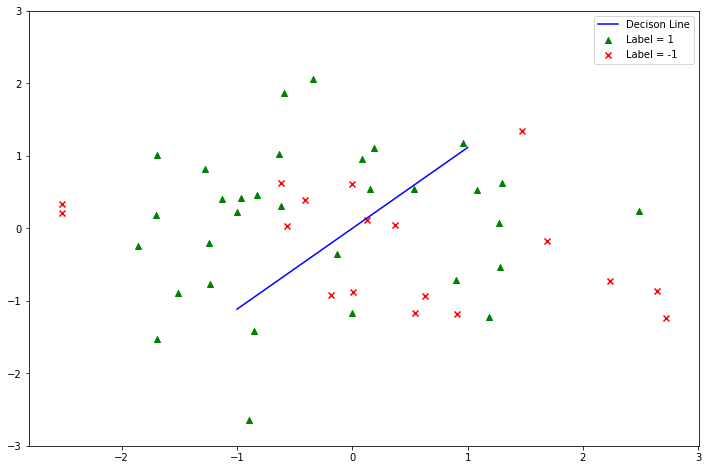

In [24]:
arr_test = np.array(y_test).reshape(50,1)
full_test_array = np.concatenate((X_test, arr_test), axis=1)
df = pd.DataFrame(full_test_array, columns = ['w0', 'w1', 'label'])
df_positive = df[df['label']==1]
df_negative = df[df['label']==-1]
positive_array = np.array(df_positive)
negative_array = np.array(df_negative)
plt.figure(figsize=(12, 8))
plt.scatter(positive_array[:,0],positive_array[:,1], marker='^', c ='green')
plt.scatter(negative_array[:,0],negative_array[:,1], marker='x', c ='red')
a = -w[0][0] / w[0][1]
A = np.linspace(-1, 1)
B = a * A / w[0][1]
plt.plot(A, B, 'b')
plt.legend(['Decison Line', 'Label = 1', 'Label = -1'])
plt.ylim(-3, 3)
plt.show()

### Experiment 2

In [25]:
mu = [-1,0]
sigma = [[0.75,0], [0,0.75]]
x1 = np.random.multivariate_normal(mu, sigma, 125)

mu = [1,0]
sigma = [[0.75,0], [0,0.75]]
x2 = np.random.multivariate_normal(mu, sigma, 125)
X = np.concatenate((x1,x2), axis=0)

y = [-1] * 125 + [1] * 125

X, y= shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

👉 Evaluating the accuracy on the Test set

In [26]:
n = 2000
w,t = simple_perceptron(X_train, y_train, n)
print("w = ", w)


No convergence
w =  [[ 1.8951916  -0.25179881]]


The perceptron algorithm does not converge because data is not linearly separable.

👉 Plotting the decision line found by the algorithm

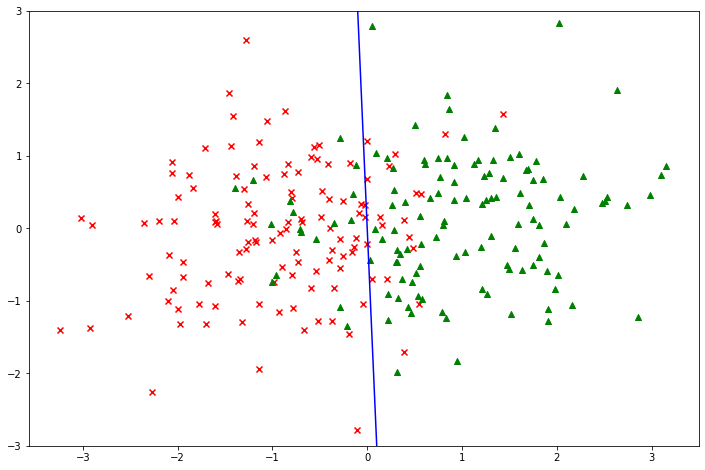

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(x1[:,0], x1[:,1], marker = 'x', c ='red')
plt.scatter(x2[:,0], x2[:,1], c = 'green', marker='^')
a = -w[0][0] / w[0][1]
A = np.linspace(-1, 1)
B = a * A / w[0][1]
plt.plot(A, B, 'b')
plt.ylim(-3, 3)
plt.show()

In [28]:
y_pred = np.inner(X_test, w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
        
print("Test set Accuracy for sigma 0.75 = {}%".format(accuracy_score(y_test, y_pred) * 100))

Test set Accuracy for sigma 0.75 = 86.0%


👉 Plotting the decision line on  the Test set

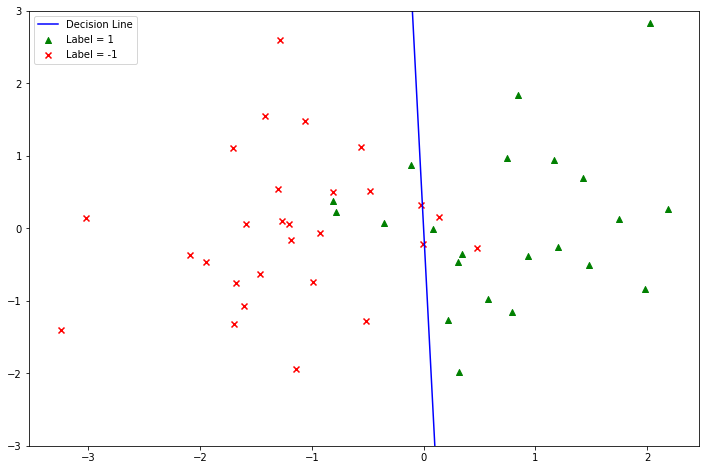

In [29]:
arr_test = np.array(y_test).reshape(50,1)
full_test_array = np.concatenate((X_test, arr_test), axis=1)
df = pd.DataFrame(full_test_array, columns = ['w0', 'w1', 'label'])
df_positive = df[df['label']==1]
df_negative = df[df['label']==-1]
positive_array = np.array(df_positive)
negative_array = np.array(df_negative)
plt.figure(figsize=(12, 8))
plt.scatter(positive_array[:,0],positive_array[:,1], marker='^', c ='green')
plt.scatter(negative_array[:,0],negative_array[:,1], marker='x', c ='red')
a = -w[0][0] / w[0][1]
A = np.linspace(-1, 1)
B = a * A / w[0][1]
plt.plot(A, B, 'b')
plt.legend(['Decision Line', 'Label = 1', 'Label = -1'])
plt.ylim(-3, 3)
plt.show()

### Experiment 3

In [30]:
def generate_data(sig):
    mu = [-1,0]
    sigma = [[sig,0], [0,sig]]
    s1 = np.random.multivariate_normal(mu,sigma,125)

    mu = [1,0]
    sigma = [[sig,0], [0,sig]]
    s2 = np.random.multivariate_normal(mu,sigma,125)
    s = np.concatenate((s1,s2),axis=0)
    
    y = [-1] * 125 
    y.extend([1] * 125)

    s,y= shuffle(s,y)
    
    return s1,s2,s,y

In [31]:
def get_accuracy(s_test,y_test,w):
    y_pred = np.inner(s_test,w) 
    for i,pred in enumerate(y_pred) :
        if pred > 0 :
            y_pred[i] = 1
        else :
            y_pred[i] = -1
    return accuracy_score(y_test,y_pred)

No convergence
No convergence
No convergence
No convergence
No convergence
[0.0, 0.0, 0.0, 0.0, 0.0]
Sigma = 0.01, Mean = 1.0
Sigma = 0.01, Variance = 0.0


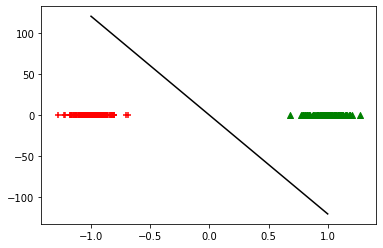

No convergence
No convergence
No convergence
No convergence
No convergence
[0.0, 0.0, 0.0, 0.0, 0.0]
Sigma = 0.1, Mean = 1.0
Sigma = 0.1, Variance = 0.0


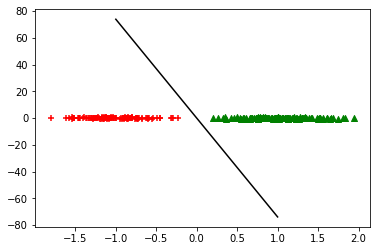

No convergence
No convergence
No convergence
No convergence
No convergence
[0.07999999999999996, 0.040000000000000036, 0.06000000000000005, 0.12, 0.16000000000000003]
Sigma = 0.5, Mean = 0.908
Sigma = 0.5, Variance = 0.04308131845707603


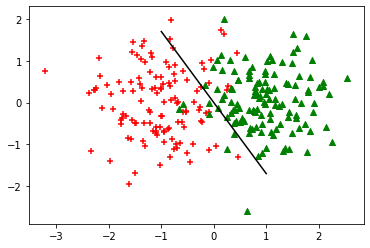

No convergence
No convergence
No convergence
No convergence
No convergence
[0.18000000000000005, 0.09999999999999998, 0.14, 0.18000000000000005, 0.18000000000000005]
Sigma = 0.7, Mean = 0.844
Sigma = 0.7, Variance = 0.03200000000000003


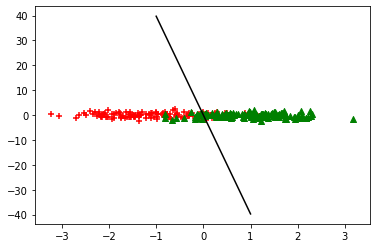

In [32]:
sigs = [0.01,0.1,0.5,0.7]
error_mean =[]
error_var = []
nb_experiments=30
for sig in sigs :
    accuracies = []
    errors = []

    for i in range(30) :
        s1,s2,s,y = generate_data(sig)
        s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)
        w,t = simple_perceptron(s_train,y_train,n)
        accuracies.append(get_accuracy(s_test,y_test,w))
        errors.append(1-get_accuracy(s_test,y_test,w))
    print(errors)
    print("Sigma = {}, Mean = {}".format(sig,np.mean(accuracies)))
    print("Sigma = {}, Variance = {}".format(sig,np.std(accuracies)))
    error_mean.append(np.mean(errors))
    error_var.append(np.std(errors))
    
    plt.scatter(s1[:,0],s1[:,1], c='red', marker='+')
    plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='^')


    a = -w[0][0] / w[0][1]
    xx = np.linspace(-1, 1)
    yy = a * xx / w[0][1]

    plt.plot(xx, yy, 'k-')
    plt.show()

In [340]:
print(error_mean)
print(error_var)

[0.0, 0.0040000000000000036, 0.24000000000000005, 0.288]
[0.0, 0.008000000000000007, 0.3503141447329811, 0.2693993318477238]


<ErrorbarContainer object of 3 artists>

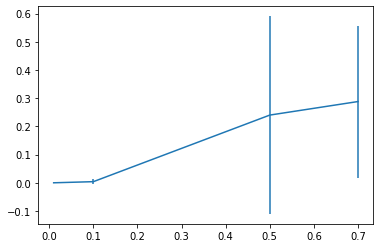

In [341]:
plt.errorbar(sigs,error_mean,error_var)

## Interpretation:
For different values of sigma, the error increases as the visualisations of the dataset shows data to be more scattered along the axes, which makes it way harder for the perceptron to find data linearly separable and hence converge naturally.